1. Perform Exploratory data analysis. (20)

○ What can you conclude from methods of central tendency and deviation of
the variables?

○ Are there any correlated variables?

○ Interpret the skewness of the variables.

In [10]:
# Load the data

import pandas as pd

data = pd.read_csv("cancer.csv")
data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [11]:
# Summary statistics

data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


1.a) From the methods of central tendency, the mean values are closer to each other, which is a good sign that every variable has some decent impact on the overall model.
Year has highest impact and Auxillary nodes have least impact.

The StandardDeviation tells us thathow much all the datapoints are deviating from the mean value and is affected by outliers.

<IPython.core.display.Javascript object>


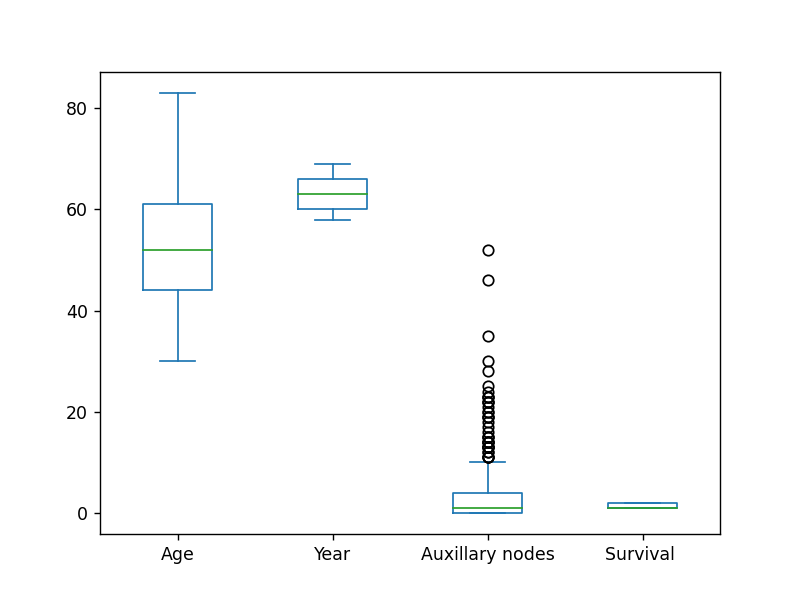

<AxesSubplot:>

In [12]:
# Box plot

%matplotlib notebook

data.plot.box()

<IPython.core.display.Javascript object>


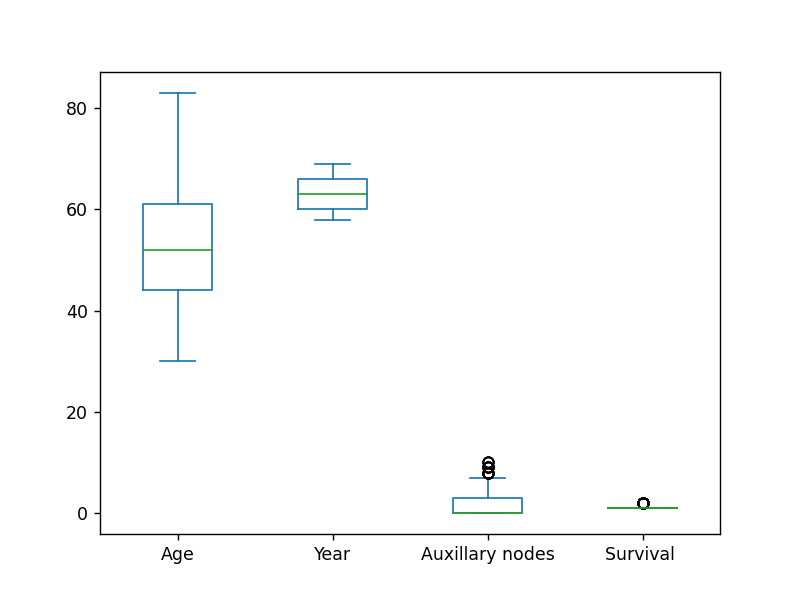

<AxesSubplot:>

In [13]:
# Removing outliers

# Max = 75% + 1.5 * (75% - 25%) (Inter-Quartile Range (IQR))

maximum = 4 + 1.5 * (4 - 0)

new_data = data[data["Auxillary nodes"] <= maximum]

new_data.plot.box()

In [14]:
# Correlation 

corr = new_data.corr()
corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


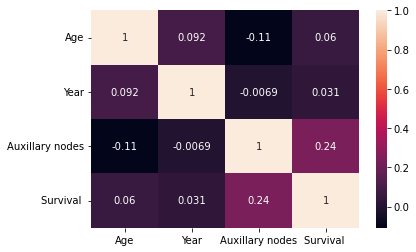

In [15]:
# Visualization - Correlation

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True)
plt.show()

1.b) By default it takes pearson as the method for evaluating correlation. So, it calculates the correlation b/w each and every variable involved. Here we are using visualization to clearly understand the correlation, so we imported the library seaborn.
There is no highly correlated variables in this case. But some have positive correlation, some have negative but not perfectly negative as they are not close to -1.

The diagonal is always 1 as the correlation with the same variable is always 1.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

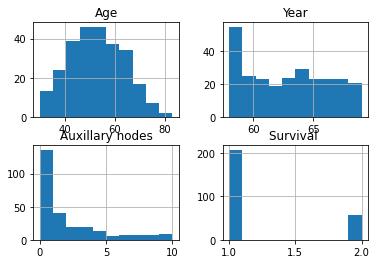

In [16]:
# Skewness
    
#from scipy.stats import skew
#for col in new_data:
#    print(col)
#    print(skew(new_data[col]))
    
#    plt.figure()
#    sns.distplot(new_data[col])
#    plt.show()

#(OR)

new_data.hist() 

1.3) Skewness is a measure of Asymmetry.
. Age is normally distributed

. Year does not have skewness.

. Survival itself has the skewness.

. Auxillary nodes are highly skewed on the right side which is positvely skewed(Right-Skewed Distribution). 
  So we can make it centered by applying log or sqrt.

As, they have negative numbers and removing skewness will result in null values and also the correlation of the variable 
with the target is somewhat great, so doesn't give much impact.

In [17]:
# Standardization and Normalization- (scikit-learn)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(new_data)

scaled = scaler.fit_transform(new_data)
scaled_data = pd.DataFrame(scaled, columns = new_data.columns)

scaled_data

,Age,Year,Auxillary nodes,Survival
0,-2.078151,-0.258085,0.507659,-0.529333
1,-2.078151,0.661993,-0.672425,-0.529333
2,-1.986534,-1.178162,0.114297,-0.529333
3,-1.986534,0.661993,0.901020,-0.529333
4,-1.803300,-1.484854,3.261188,-0.529333
...,...,...,...,...
260,2.044615,-0.258085,-0.279064,-0.529333
261,2.136233,1.275378,-0.672425,-0.529333
262,2.227850,0.661993,0.507659,-0.529333
263,2.319467,0.661993,-0.279064,1.889171


In [18]:
new_data.to_csv("final.csv")